In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/Placement_Data.csv')

## 1. Understanding the data

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.shape

(215, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [11]:
df.nunique()

,0
sl_no,215
gender,2
ssc_p,103
ssc_b,2
hsc_p,97
hsc_b,2
hsc_s,3
degree_p,89
degree_t,3
workex,2


##2.Cleaning the data

In [12]:
df.duplicated().sum()

0

Data has no duplicates

In [13]:
null_values = df.isnull().sum()
print(null_values)

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [14]:
df['salary'].describe()

,salary
count,148.000000
mean,288655.405405
std,93457.452420
min,200000.000000
25%,240000.000000
50%,265000.000000
75%,300000.000000
max,940000.000000


In [16]:
x = df.iloc[:,13:15]
y = x[x['status'] == 'Not Placed']
print(y)

         status  salary
3    Not Placed     NaN
5    Not Placed     NaN
6    Not Placed     NaN
9    Not Placed     NaN
12   Not Placed     NaN
..          ...     ...
198  Not Placed     NaN
201  Not Placed     NaN
206  Not Placed     NaN
208  Not Placed     NaN
214  Not Placed     NaN

[67 rows x 2 columns]


Therefore salary of Not placed students must be 0.

In [17]:
df['salary'].fillna(0,inplace = True)

<ipython-input-17-7ae93b58ddcd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(0,inplace = True)


In [18]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Univariate Analysis of categorical columns

In [19]:
df['gender'].value_counts()

,count
gender,
M,139
F,76


In [20]:
df['ssc_b'].value_counts()

,count
ssc_b,
Central,116
Others,99


In [21]:
df['hsc_b'].value_counts()

,count
hsc_b,
Others,131
Central,84


In [22]:
df['hsc_s'].value_counts()

,count
hsc_s,
Commerce,113
Science,91
Arts,11


In [23]:
df['degree_t'].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [24]:
df['workex'].value_counts()

,count
workex,
No,141
Yes,74


In [25]:
df['specialisation'].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [26]:
df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


## Univariate Analysis of Numerical columns

<Axes: xlabel='ssc_p', ylabel='Count'>

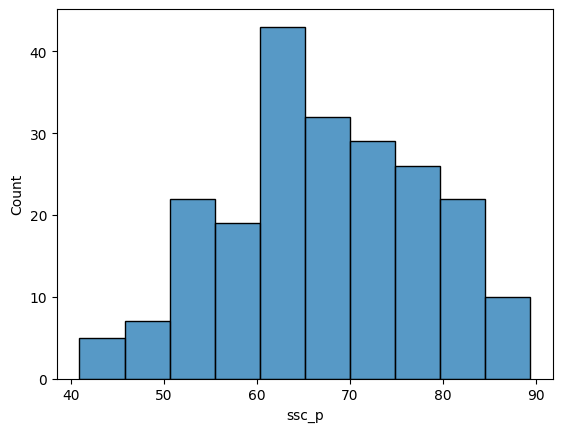

In [27]:
sns.histplot(df['ssc_p'])

<Axes: xlabel='hsc_p', ylabel='Count'>

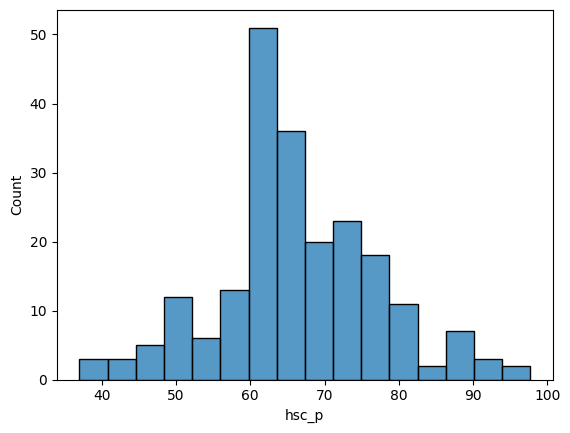

In [29]:
sns.histplot(df['hsc_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

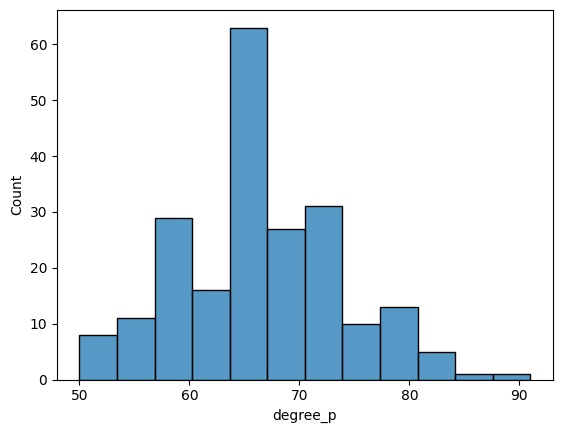

In [30]:
sns.histplot(df['degree_p'])

<Axes: xlabel='etest_p', ylabel='Count'>

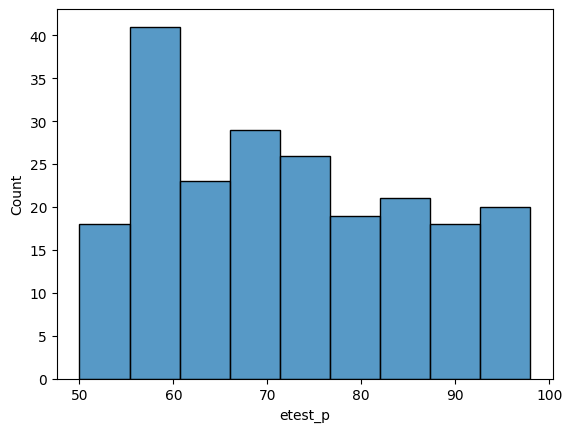

In [31]:
sns.histplot(df['etest_p'])

<Axes: xlabel='mba_p', ylabel='Count'>

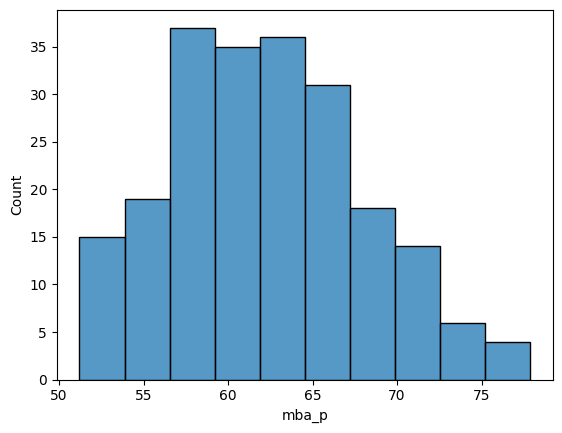

In [32]:
sns.histplot(df['mba_p'])

<Axes: xlabel='salary', ylabel='Count'>

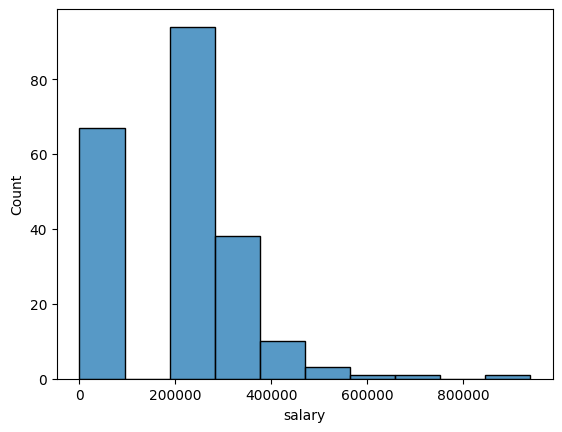

In [33]:
sns.histplot(df['salary'])

Salary column has some outliers.

## Multi-variate Analysis

Text(0.5, 1.0, 'No of students placed amongst gender')

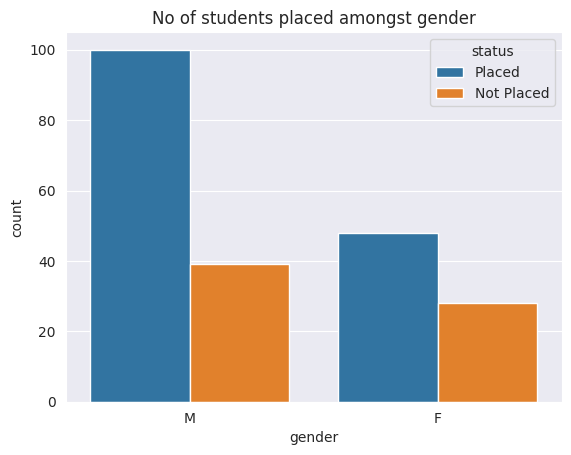

In [50]:
sns.set_style('darkgrid')
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

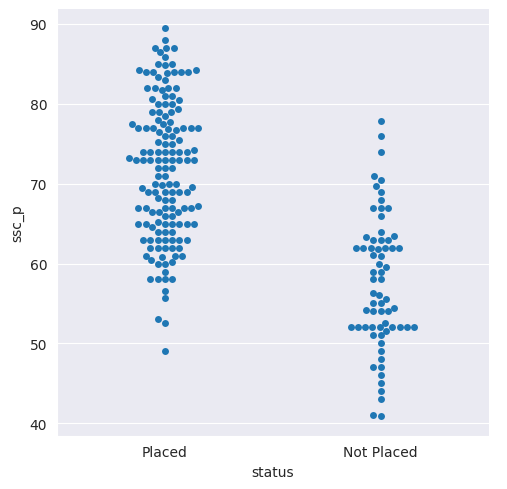

In [58]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm")

The minimum aggregate percentage of placed students in ssc is 50%.

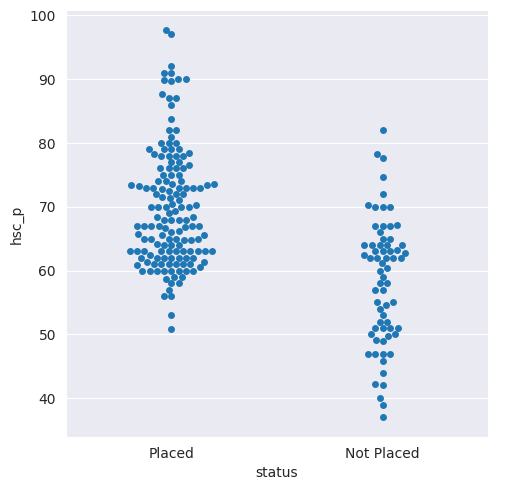

In [59]:
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm")

The minimum aggregate percentage of placed students in hsc is 50% .

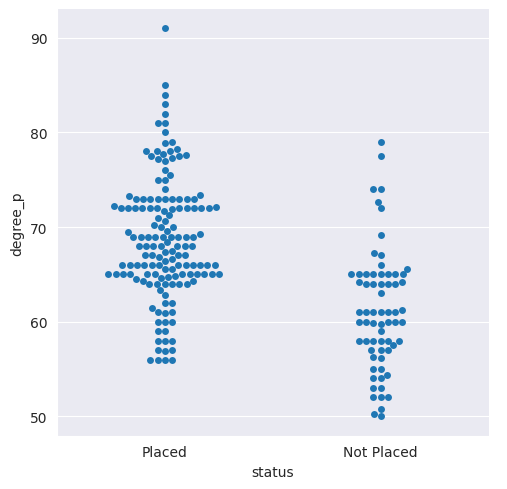

In [60]:
sns.catplot(x="status", y="degree_p", data=df,kind="swarm")

The minimum aggregate percentage of placed students in degree is 55% .

Text(0.5, 1.0, 'No of students placed based on specialization')

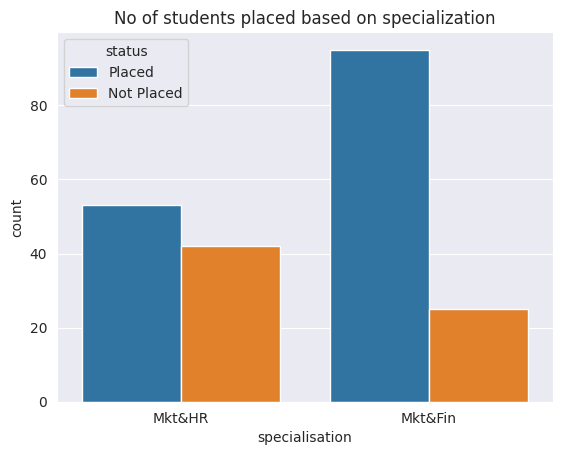

In [51]:
sns.set_style('darkgrid')
sns.countplot(x = 'specialisation', hue = 'status', data = df)
plt.title('No of students placed based on specialization')

Majority of the students who chose marketing and finance are placed compared to students who chose marketing and HR

Text(0.5, 1.0, 'No of students placed based on work experience')

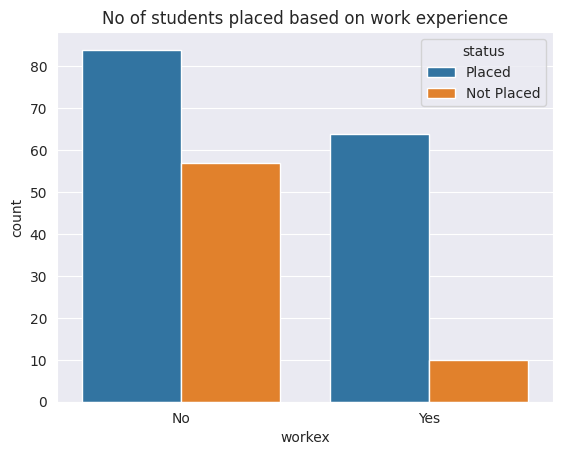

In [52]:
sns.set_style('darkgrid')
sns.countplot(x = 'workex', hue = 'status', data = df)
plt.title('No of students placed based on work experience')

Majority of students who have work experience are placed.

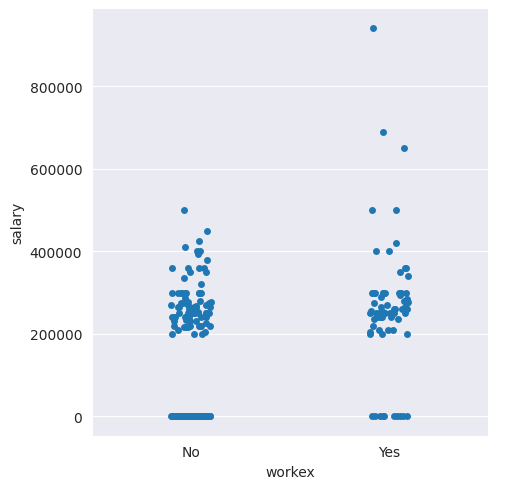

In [68]:
sns.catplot(data = df,x = 'workex', y = 'salary', kind = "strip" )

The Minimum salary of a student with and without work experience is 2,00,000 and the maximum salary of a student without work experience is around 5,00,000 and the maximum salary of a student with work experience can go beyond 8,00,000.